<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Report using Random Forest
Accuracy of training set is 0.9964253798033958
Accuracy of testing set is 0.8875
Classification Report               precision    recall  f1-score   support

           0       0.90      0.98      0.94       414
           1       0.71      0.30      0.43        66

   micro avg       0.89      0.89      0.89       480
   macro avg       0.81      0.64      0.68       480
weighted avg       0.87      0.89      0.87       480

Confusion Matrix [[406   8]
 [ 46  20]]
Report using Support Vector Machine
Accuracy of training set is 0.9016979445933869
Accuracy of testing set is 0.8916666666666667
Classification Report               precision    recall  f1-score   support

           0       0.90      0.98      0.94       414
           1       0.73      0.33      0.46        66

   micro avg       0.89      0.89      0.89       480
   macro avg       0.82      0.66      0.70       480
weighted avg       0.88      0.89      0.87       480

Confusion Matrix [[406   

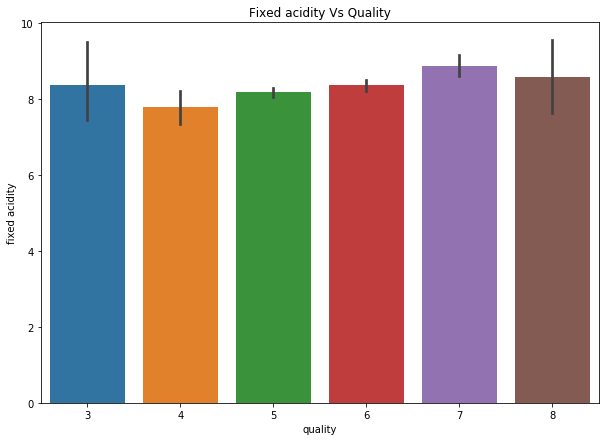

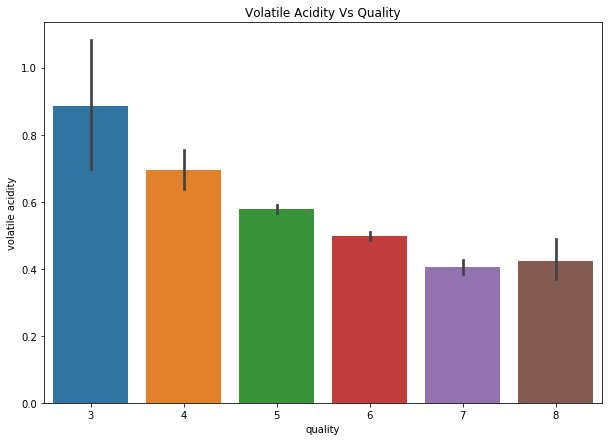

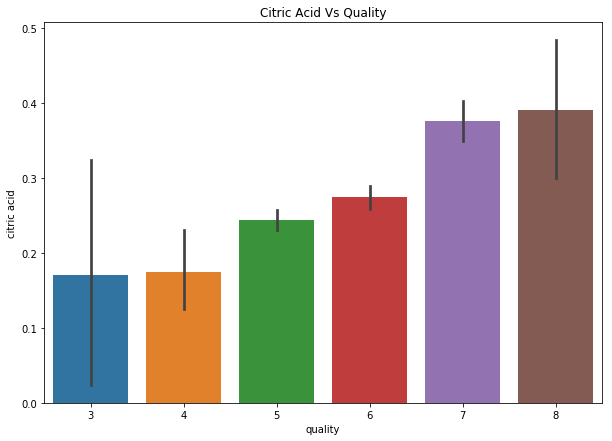

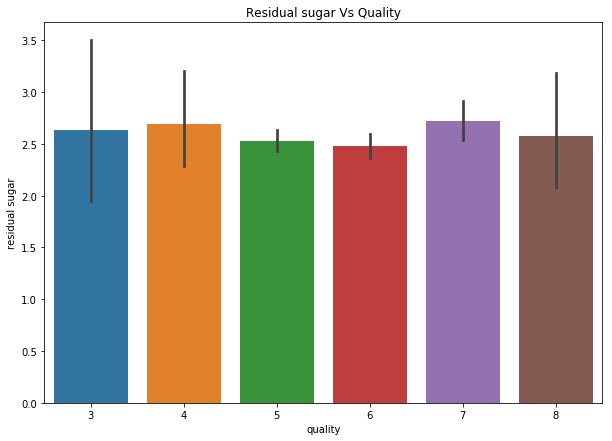

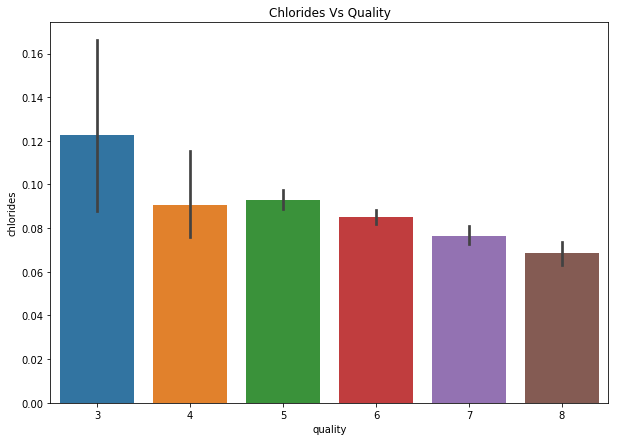

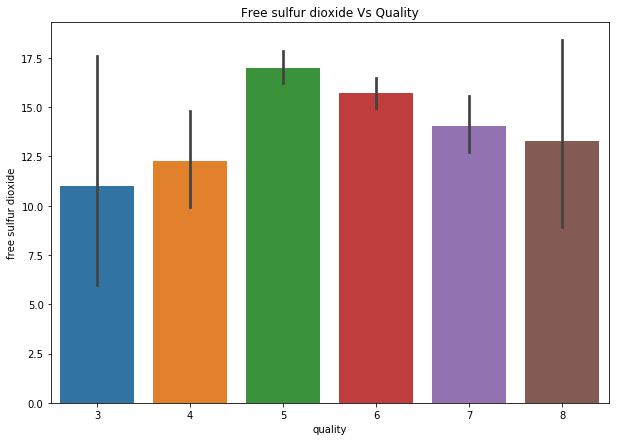

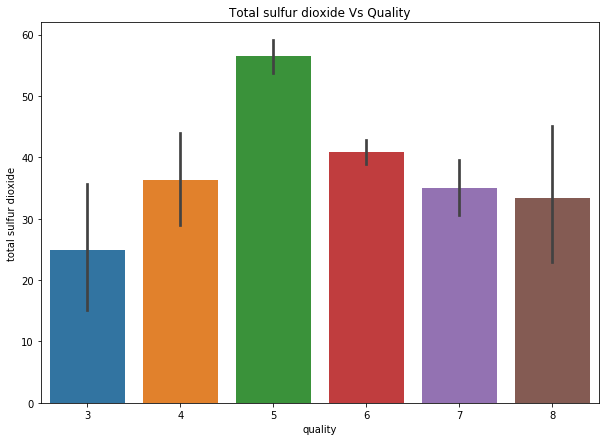

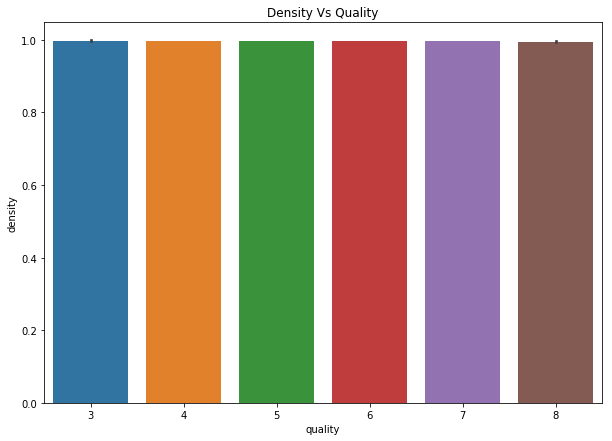

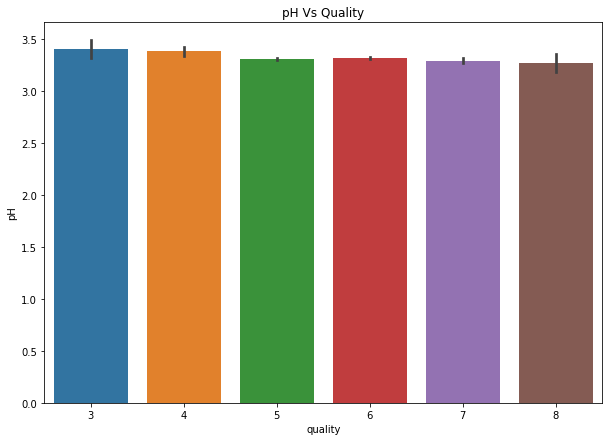

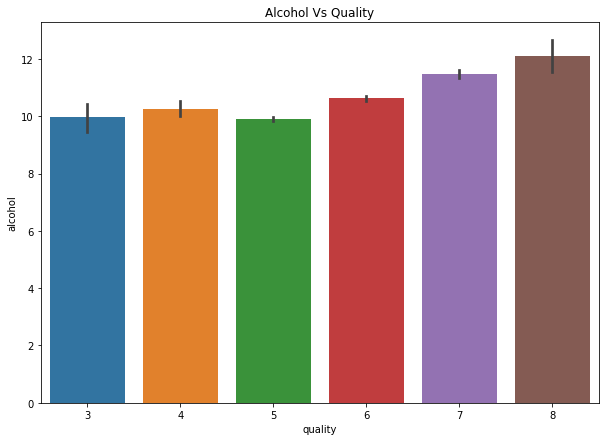

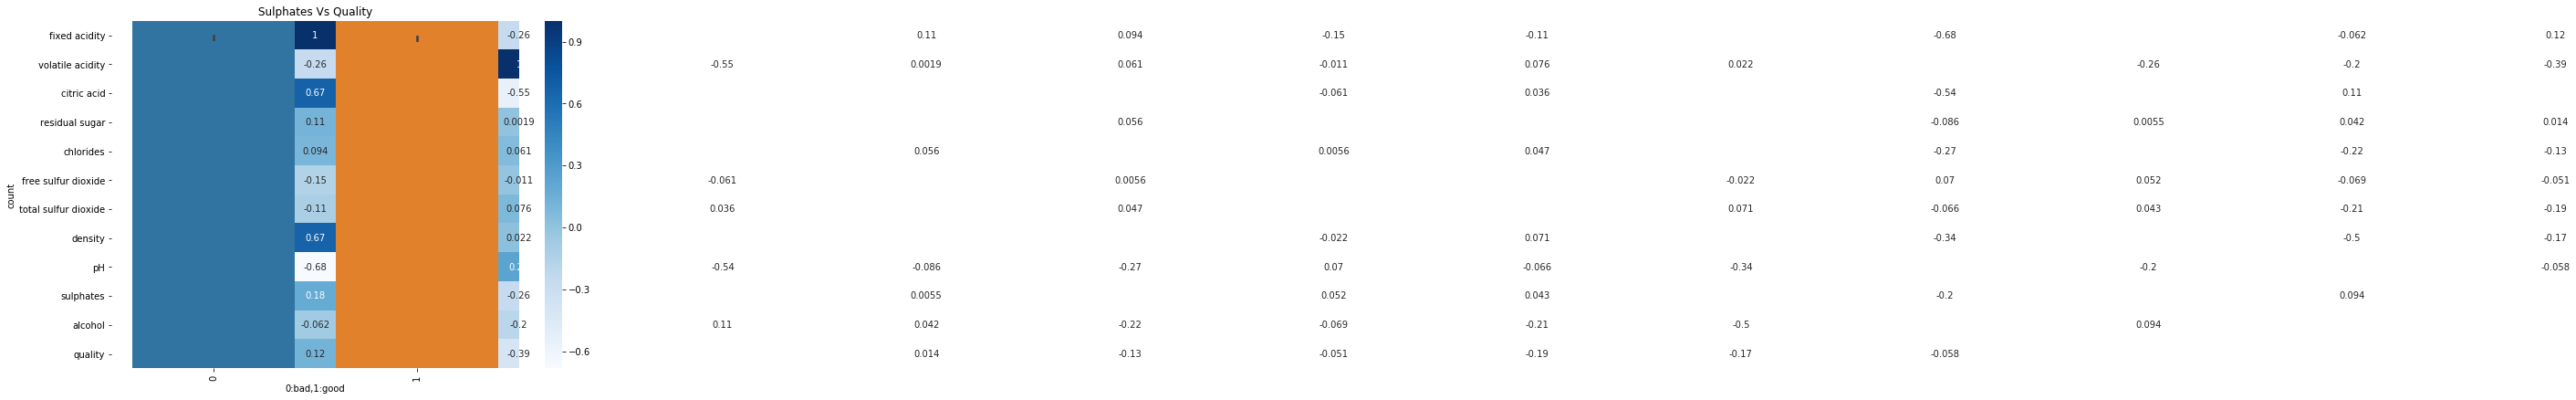

In [5]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('../input/winequality-red.csv')
df.head()

df.isnull().sum()
df.info()

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='fixed acidity',data=df)
plt.title('Fixed acidity Vs Quality')

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='volatile acidity',data=df)
plt.title('Volatile Acidity Vs Quality')

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='citric acid',data=df)
plt.title('Citric Acid Vs Quality')

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='residual sugar',data=df)
plt.title('Residual sugar Vs Quality')

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='chlorides',data=df)
plt.title('Chlorides Vs Quality')

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='free sulfur dioxide',data=df)
plt.title('Free sulfur dioxide Vs Quality')

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='total sulfur dioxide',data=df)
plt.title('Total sulfur dioxide Vs Quality')

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='density',data=df)
plt.title('Density Vs Quality')

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='pH',data=df)
plt.title('pH Vs Quality')

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='alcohol',data=df)
plt.title('Alcohol Vs Quality')

plt.figure(figsize=(10,7))
sns.barplot(x='quality',y='sulphates',data=df)
plt.title('Sulphates Vs Quality')


sns.heatmap(df.corr(),annot=True,cmap='Blues')

#Data Preprocessing

#Diving quality of wine as good and bad 
bins=(2,6,8)

df['quality']=pd.cut(df['quality'],bins=bins,labels=['bad','good'])

#Assign labels to our quality variable
from sklearn.preprocessing import LabelEncoder,StandardScaler
quality_labels=LabelEncoder()
df['quality']=quality_labels.fit_transform(df['quality'])
df['quality'].value_counts()
sns.countplot(x='quality',data=df)
plt.xlabel('0:bad,1:good')

#Splitting the data as dependent and independent variables
X=df.drop('quality',axis=1)
y=df['quality']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

#Apply scaling the data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


#Random Forest Classifier

#Train the model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

#Evaluation of model
y_predr=rf.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Report using Random Forest')
print('Accuracy of training set is',accuracy_score(y_train,rf.predict(X_train)))
print('Accuracy of testing set is',accuracy_score(y_test,y_predr))
print('Classification Report',classification_report(y_test,y_predr))
print('Confusion Matrix',confusion_matrix(y_test,y_predr))
 #Random Forest  gets accuracy 88%

#SVM
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

#Evaluation
y_preds=sv.predict(X_test)
print('Report using Support Vector Machine')
print('Accuracy of training set is',accuracy_score(y_train,sv.predict(X_train)))
print('Accuracy of testing set is',accuracy_score(y_test,y_preds))
print('Classification Report',classification_report(y_test,y_preds))
print('Confusion Matrix',confusion_matrix(y_test,y_preds))

#Support Vector gets accuracy 89%

#Improving accuracy of model by GridSearchCV
from sklearn.model_selection import GridSearchCV

param={'C':[0.1,0.3,0.6,0.8,1,1.1,1.2,1.3,1.4,1.5,1.6,1.8],
       'gamma':[0.1,0.3,0.6,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.8,1.9],
       'kernel':['linear','rbf']
       }

grid_sv=GridSearchCV(SVC(),param_grid=param,cv=10,scoring='accuracy')

grid_sv.fit(X_train,y_train)
grid_sv.best_params_

sv1=SVC(C=1.8, gamma = 1.8, kernel='rbf')
sv1.fit(X_train,y_train)
#Evaluation
y_predsv=sv1.predict(X_test)
print('Report using GridSearchCV with SVC')
print('Accuracy of training set is',accuracy_score(y_train,sv1.predict(X_train)))
print('Accuracy of testing set is',accuracy_score(y_test,y_predsv))
print('Classification Report',classification_report(y_test,y_predsv))
print('Confusion Matrix',confusion_matrix(y_test,y_predsv))

#Accuracy is 89%


#Using Cross Validation Random Forest
from sklearn.model_selection import cross_val_score

rf_cv=cross_val_score(rf,X_train,y_train,cv=20,scoring='accuracy')
print('Accuracy using Cross Validation with Random Forest')
print(rf_cv.mean())
#In this accuracy is 90%
#With cross validation in random forest, I get an accuracy of 90%.Earlier it was 88%.



